# REINFORCE (Monte Carlo Policy Gradient) on CartPole-v0

## Imports

In [1]:
import gym
gym.logger.set_level(40) # suppress warnings (please remove if gives error)
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from reinforce_agent import REINFORCE as Agent

c:\Users\aljos\miniconda3\envs\drlnd\lib\site-packages\gym\core.py:27: UserWarning: WARN: Gym minimally supports python 3.6 as the python foundation not longer supports the version, please update your version to 3.7+
  "Gym minimally supports python 3.6 as the python foundation not longer supports the version, please update your version to 3.7+"


In [2]:
# set up environment
env = gym.make('CartPole-v0')
print('observation space:', env.observation_space)
print('action space:', env.action_space)

observation space: Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
action space: Discrete(2)


In [3]:
agent = Agent(state_size=env.observation_space.shape[0], action_size=env.action_space.n)

In [4]:
def model(n_epsidoes=2000, max_t=1000, print_every=100):
    scores_window = deque(maxlen=print_every)
    scores = []
    for i_episode in range(1, n_epsidoes+1):
        # reset environment
        state = env.reset()[0]
        agent.reset_memory()
        for t in range(max_t):
            # select action
            action, log_prob = agent.act(state)

            # take action in environment
            next_state, reward, done, _, _ = env.step(action)

            # check if episode finished
            if done:
                break
            
            # save experience
            agent.step(reward=reward, log_prob=log_prob)

            # update state
            state = next_state
        
        # record reward
        scores_window.append(sum(agent.rewards))
        scores.append(sum(agent.rewards))
        
        # update network weights
        agent.learn()
        agent.increase_eps_counter()
        
        # print results
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=195.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            break

    return scores

In [5]:
scores = model()

Episode 100	Average Score: 39.59
Episode 200	Average Score: 44.29
Episode 300	Average Score: 79.96
Episode 400	Average Score: 63.69
Episode 500	Average Score: 93.17
Episode 600	Average Score: 96.30
Episode 700	Average Score: 153.87

Environment solved in 643 episodes!	Average Score: 195.41


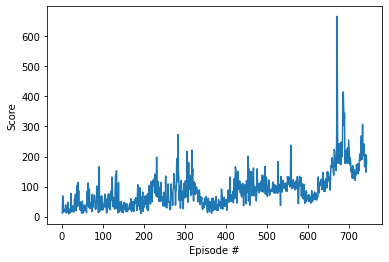

In [7]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()